# Exploratory Data Analysis: Visualizations of Crop Illness and Quality From ViviendasLeon

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Necessary Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_style("whitegrid")

## Upload Dataset, Organize Column Names
- Note: The dataset in this notebook is the combined data from 2017-2019 and 2019-2020

In [55]:
misc_cols = ["Fecha Visita", "Auditor", "Unnamed: 2", "Comunidad", "Familia visitada", "Presente?"]
col_names = ["Estado", "% Enfermedad", "Calidad", "Plaga", "Recomendacion Organico", "Recomendacion Quimico"]
fruit_cols = ["Fruta"] + [col for col in col_names]
veg_cols = ["Vegetales"] + [col + ".1" for col in col_names]
leg_cols = ["Leguminosas y semillas"] + [col + ".2" for col in col_names]
grain_cols = ["Gramíneos"] + [col + ".3" for col in col_names]

all_data = pd.read_csv("/content/drive/MyDrive/UC Berkeley/Freshman Year/Clubs/DataGood/my_data/vl_cleaned_2017-2020.csv")
# Convert date strings to datetime objects
def convert_date(date):
  split = date.split()
  split[1] = split[1].strip(',')
  if len(split[1]) < 2:
    split[1] = '0' + split[1]
  return ''.join(split)
all_data["Fecha Visita"] = pd.to_datetime(all_data["Fecha Visita"].apply(convert_date), format="%B%d%Y")
all_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Fruta,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico,Vegetales,Estado.1,% Enfermedad.1,Calidad.1,Plaga.1,Recomendacion Organico.1,Recomendacion Quimico.1,Leguminosas y semillas,Estado.2,% Enfermedad.2,Calidad.2,Plaga.2,Recomendacion Organico.2,Recomendacion Quimico.2,Gramíneos,Estado.3,% Enfermedad.3,Calidad.3,Plaga.3,Recomendacion Organico.3,Recomendacion Quimico.3,Comentarios/Observaciones Adicionales,Respuesta / Seguimiento a comentarios,Unnamed: 36
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Papaya,Transplantado,1.0,Bueno,NaN,NaN,NaN,Chiltoma,Transplantado,2,Bueno,Crizop,Ace,NaN,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Nim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chiltoma,Transplantado,0,Bueno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN,Chiltoma,Almácigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,El cultivo d tomate no esta registrado en el f...,El tomate está en las opciones de fruta.,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN,Cebolla,Almácigo,2,Bueno,Mosca blanca,Ace,NaN,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Ajo y Cebolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Calala,Transplantado,2.0,Bueno,NaN,NaN,NaN,Chiltoma,Transplantado,2,Bueno,Mosca blanca,Ajo y Cebolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis of Fruit Crops

In [56]:
fruit_data = all_data[misc_cols + fruit_cols].copy()
fruit_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Fruta,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Papaya,Transplantado,1.0,Bueno,NaN,NaN,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Calala,Transplantado,2.0,Bueno,NaN,NaN,NaN


In [57]:
# Correct typos
fruit_data["Fruta"] = (fruit_data["Fruta"].replace("piña", "Pina")).replace("Sandia y melon", "Sandia")
print(fruit_data["Fruta"].value_counts(), '\n')
print(fruit_data["Calidad"].value_counts(), '\n')

Tomate        776
Papaya        672
Plátano       600
Sandia        209
Melon         161
Calala        100
Guayaba        65
Piña           39
Jamaica        18
Granadilla     13
Pina            3
Verenjena       3
Repollo         2
Caña            1
Remolacha       1
Chile           1
Name: Fruta, dtype: int64 

Bueno        1049
Excelente    1006
Promedio      179
Pobre          18
Name: Calidad, dtype: int64 



### Fruit Crop Illness and Quality

In [58]:
fruit_disease = fruit_data[["Fruta", "% Enfermedad"]].dropna()
fruit_quality = fruit_data[["Fruta", "Calidad"]].dropna()

#### Fruit Disease

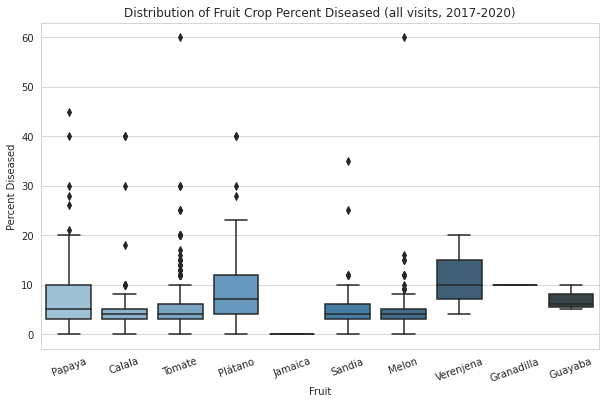

In [59]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Fruta", y="% Enfermedad", data=fruit_disease, palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel("Fruit")
plt.ylabel("Percent Diseased")
plt.title("Distribution of Fruit Crop Percent Diseased (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Distribution of Fruit Crop Percent Diseased (all visits, 2017-2020).png", dpi=300)
plt.show()

#### Fruit Quality Distributions

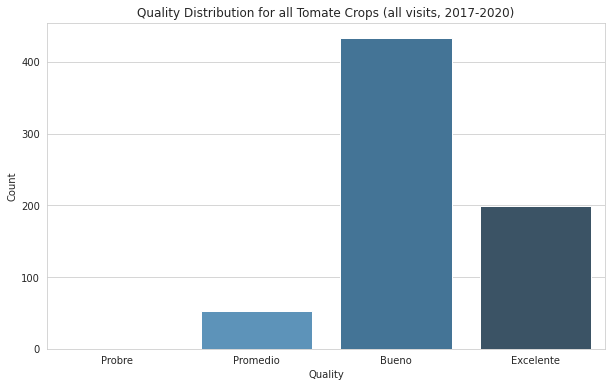

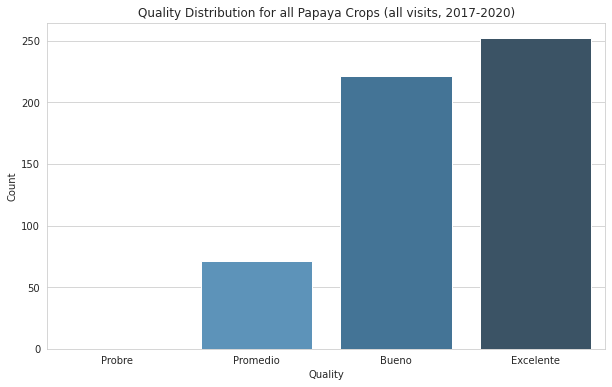

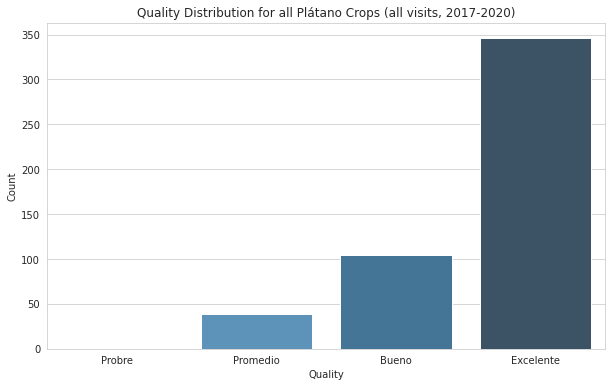

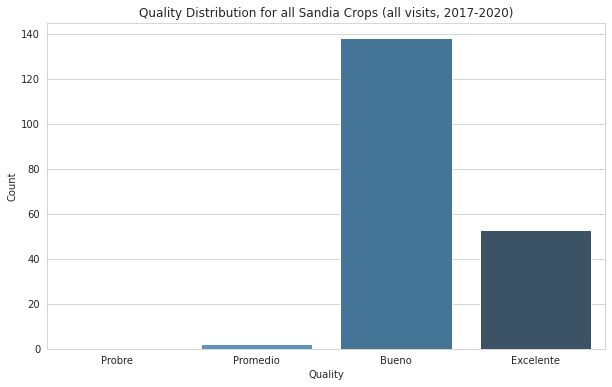

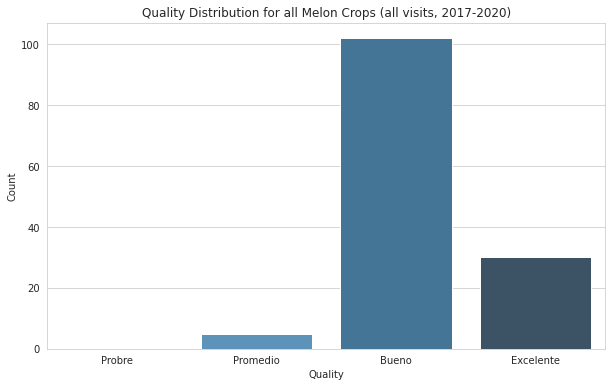

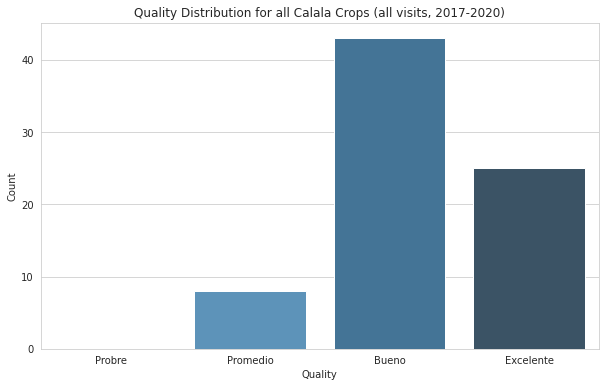

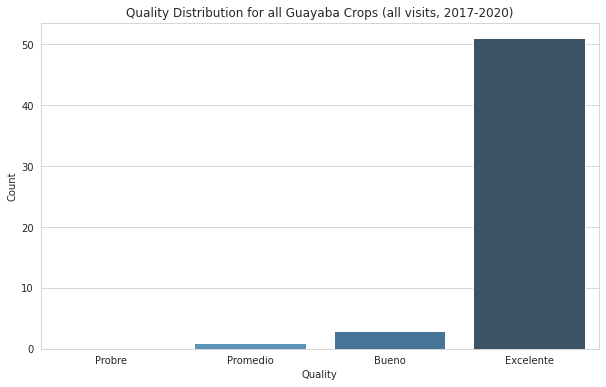

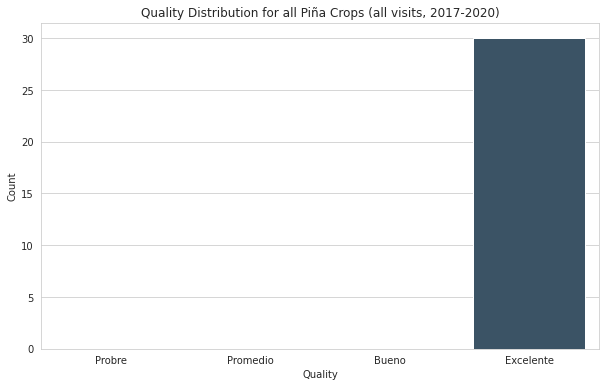

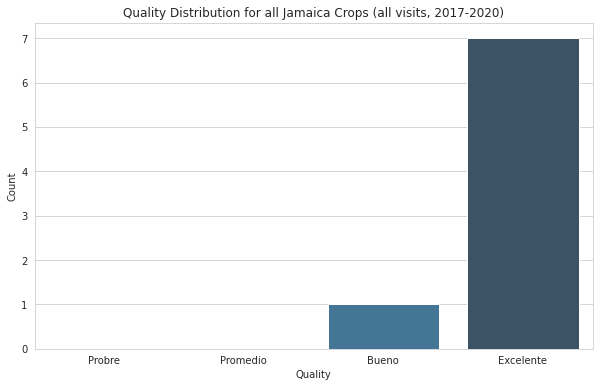

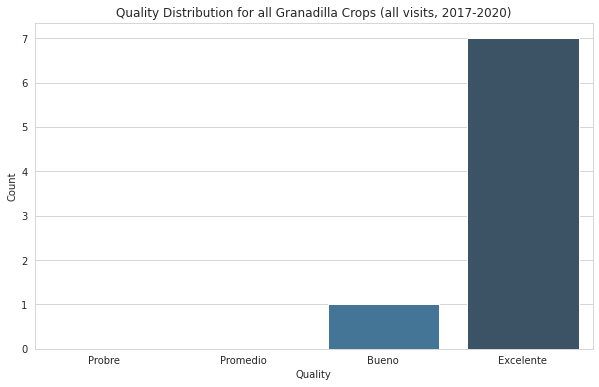

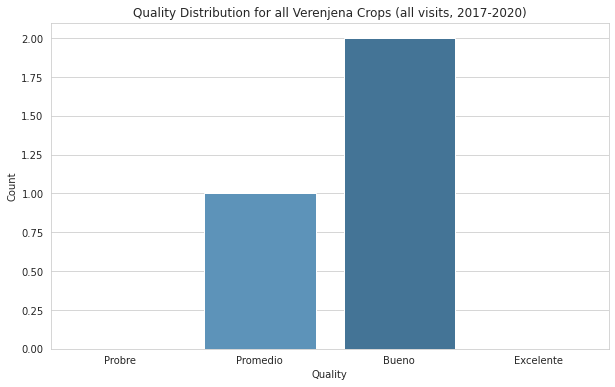

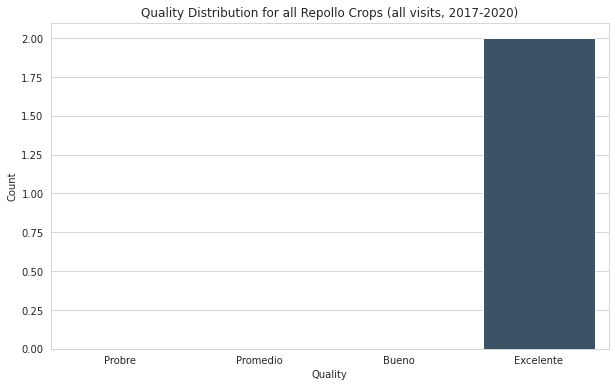

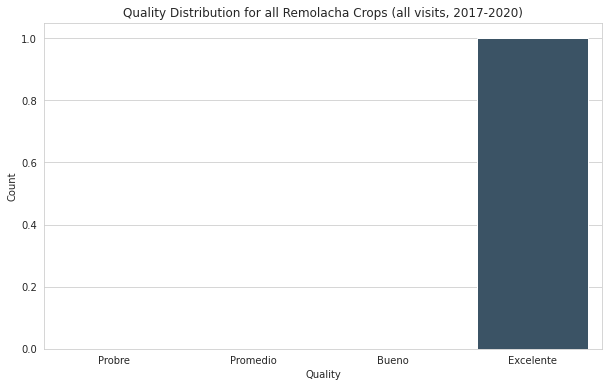

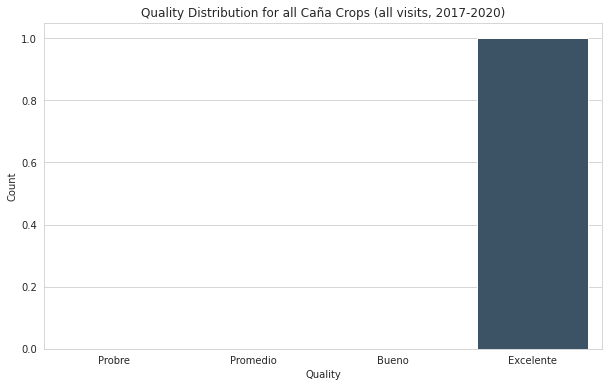

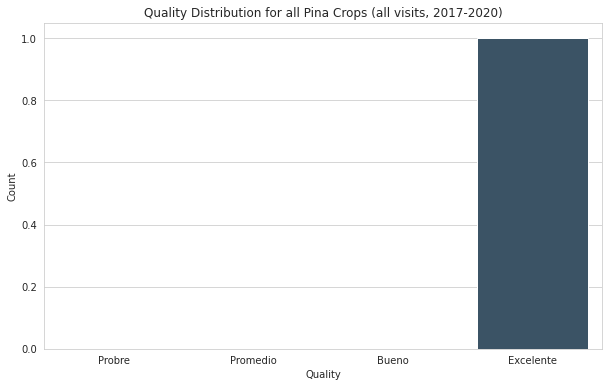

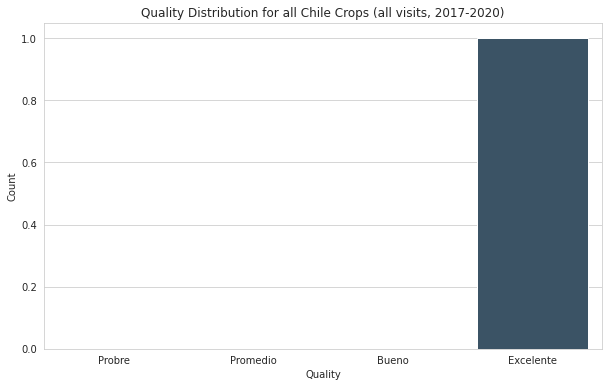

In [60]:
plt.rcParams["figure.figsize"] = (10,6)
for fruit in sorted((fruit_quality["Fruta"].unique()), key=lambda x: -fruit_quality["Fruta"].value_counts()[x]):
  data = fruit_quality[fruit_quality["Fruta"] == fruit]
  g = sns.countplot(x="Calidad", data=data,order=["Probre", "Promedio", "Bueno", "Excelente"], palette="Blues_d")
  g.set_title(f"Quality Distribution for all {fruit} Crops (all visits, 2017-2020)")
  g.set_xlabel("Quality")
  g.set_ylabel("Count")
  plt.savefig(f"/content/drive/MyDrive/Quality Distribution for all {fruit} Crops (all visits, 2017-2020).png", dpi=300)
  plt.show()

### How Fruit Crop Illness Has Changed Over Time for all Farms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


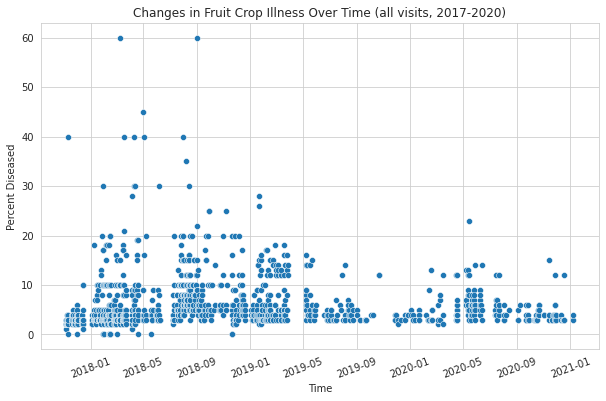

In [61]:
fruit_time_dis = fruit_data[["Fecha Visita", "% Enfermedad"]].dropna()

plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(fruit_time_dis['Fecha Visita'], fruit_time_dis['% Enfermedad'], palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel('Time')
plt.ylabel('Percent Diseased')
plt.title("Changes in Fruit Crop Illness Over Time (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Changes in Fruit Crop Illness Over Time (all visits, 2017-2020).png", dpi=300)

## Analysis of Vegetable Crops

In [62]:
vegetable_data = all_data[misc_cols + veg_cols].copy()
vegetable_data = vegetable_data.rename(columns={"% Enfermedad.1": "% Enfermedad", "Calidad.1": "Calidad"})
vegetable_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Vegetales,Estado.1,% Enfermedad,Calidad,Plaga.1,Recomendacion Organico.1,Recomendacion Quimico.1
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Chiltoma,Transplantado,2,Bueno,Crizop,Ace,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,Chiltoma,Transplantado,0,Bueno,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Chiltoma,Almácigo,NaN,NaN,NaN,NaN,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Cebolla,Almácigo,2,Bueno,Mosca blanca,Ace,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Chiltoma,Transplantado,2,Bueno,Mosca blanca,Ajo y Cebolla,NaN


In [63]:
vegetable_data["Vegetales"] = vegetable_data["Vegetales"].replace({"Verengena": "Berenjena", "Verenjena": "Berenjena", "verengena": "Berenjena", "Verngena": "Berenjena", "verenjena": "Berenjena", "Calabasa": "Calabaza", "Chile..": "Chile", "Chile jalapeño": "Chile", "zanahoria": "Zanahoria", "Rabano": "Rábano"})
vegetable_data = vegetable_data[(vegetable_data["Vegetales"] != "Tomate")]
vegetable_data["Calidad"] = vegetable_data["Calidad"].replace({"Excel": "Excelente"})
# Clean the percent diseased values
def clean_percents(value):
  if isinstance(value, str):
    temp = re.findall(r'\d+', value)
    try:
      return float(temp[0])
    except:
      return None
  return value
vegetable_data["% Enfermedad"] = vegetable_data["% Enfermedad"].apply(clean_percents)

print(vegetable_data["Vegetales"].value_counts(), '\n')
print(vegetable_data["Calidad"].value_counts(), '\n')

Chiltoma     1321
Yuca          461
Ayote         326
Cebolla       284
Pepino        278
Chile          34
Camote         27
Berenjena      22
Rábano         19
Zanahoria       4
Repollo         4
Remolacha       3
Calabaza        2
Pipian          1
Name: Vegetales, dtype: int64 

Bueno        1307
Excelente    1134
Promedio      137
Pobre          27
Name: Calidad, dtype: int64 



### Vegetable Crop Illness and Quality

In [64]:
vegetable_data.replace(' ', np.nan, inplace=True)
vegetable_disease = vegetable_data[["Vegetales", "% Enfermedad"]].dropna()
vegetable_quality = vegetable_data[["Vegetales", "Calidad"]].dropna()

#### Vegetable Disease

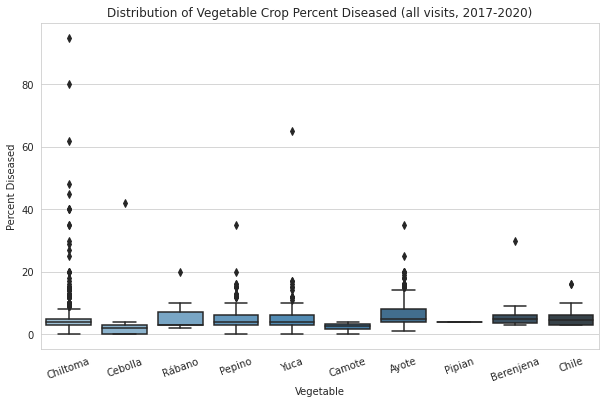

In [65]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Vegetales", y="% Enfermedad", data=vegetable_disease, palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel("Vegetable")
plt.ylabel("Percent Diseased")
plt.title("Distribution of Vegetable Crop Percent Diseased (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Distribution of Vegetable Crop Percent Diseased (all visits, 2017-2020).png", dpi=300)
plt.show()

#### Vegetable Quality Distributions

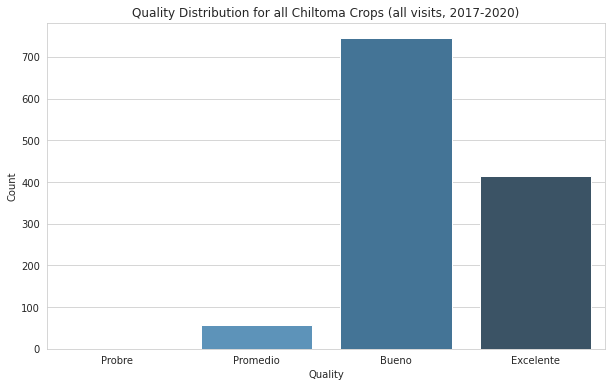

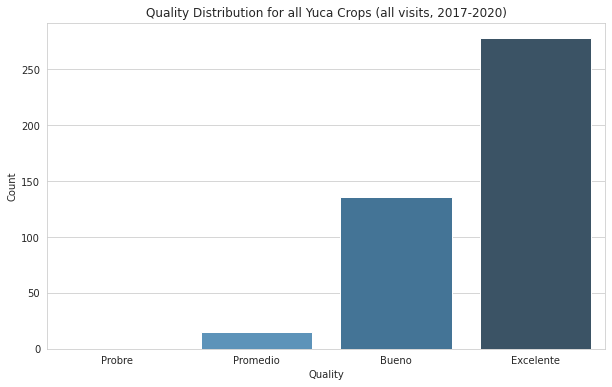

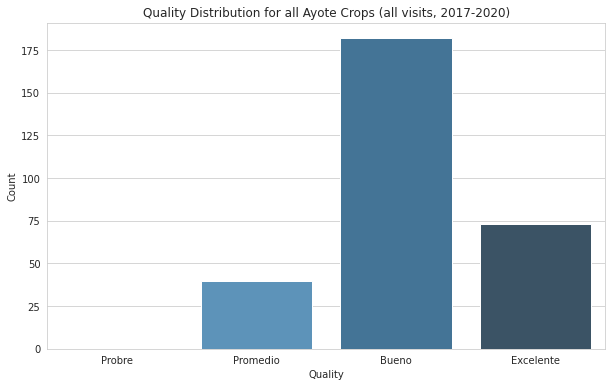

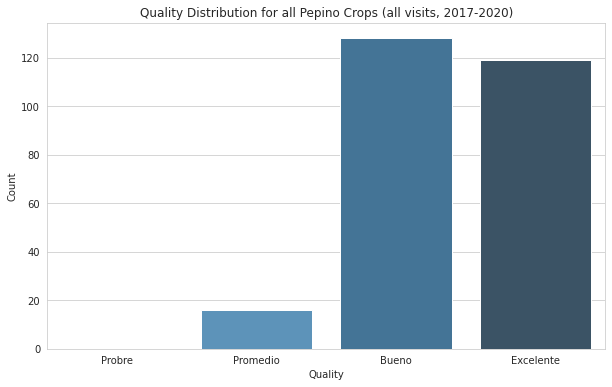

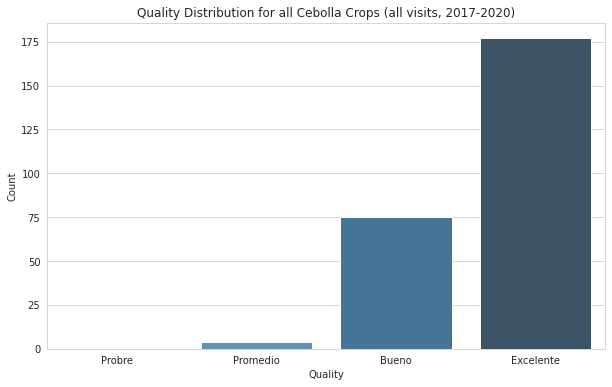

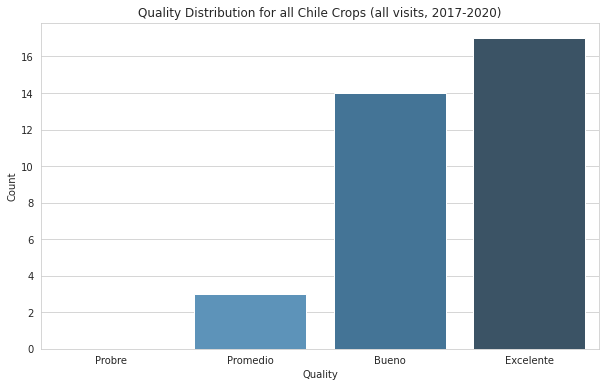

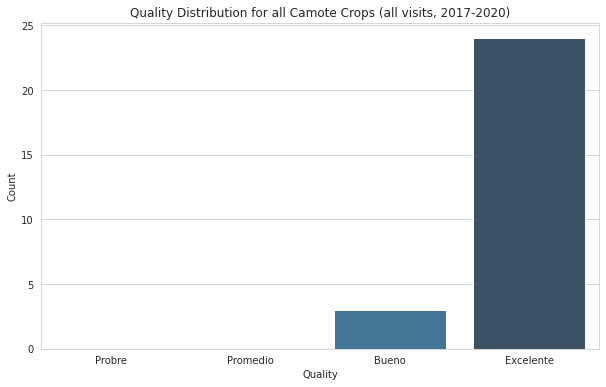

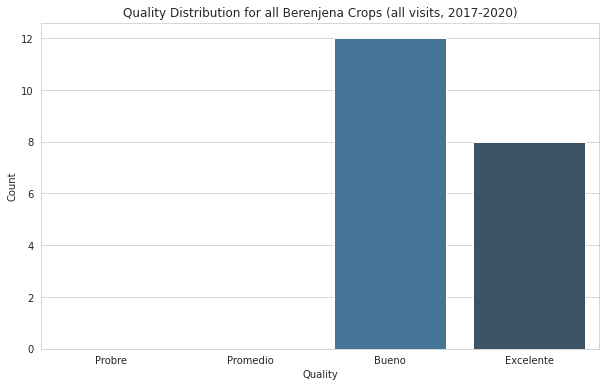

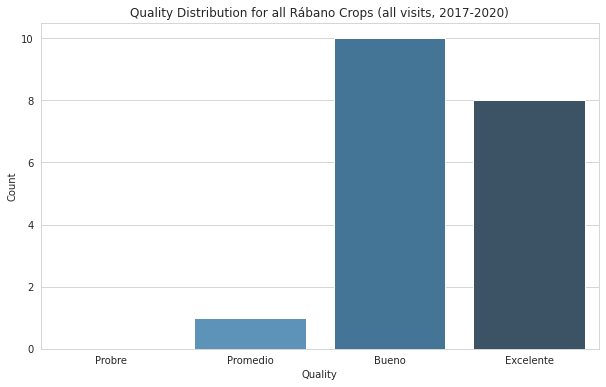

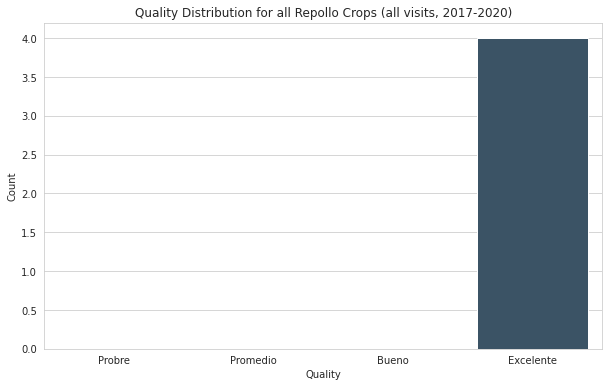

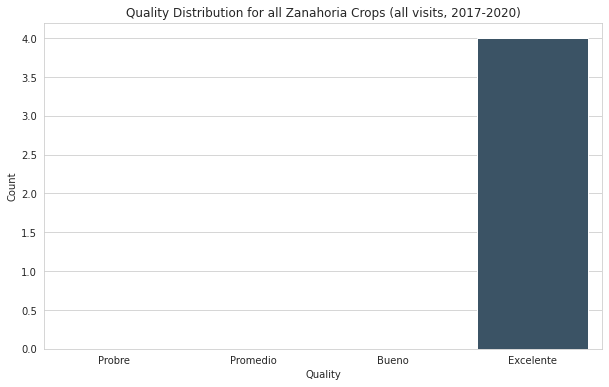

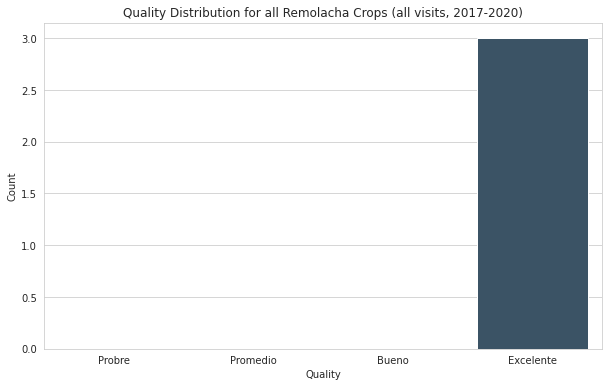

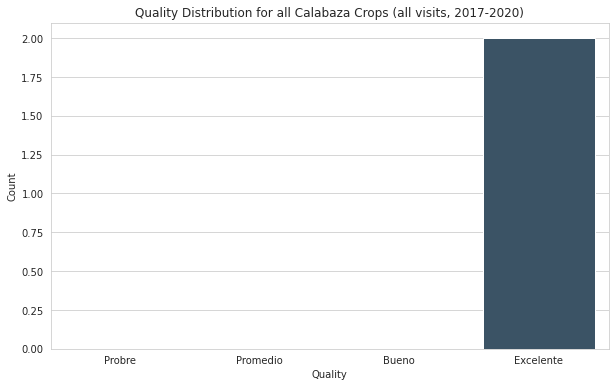

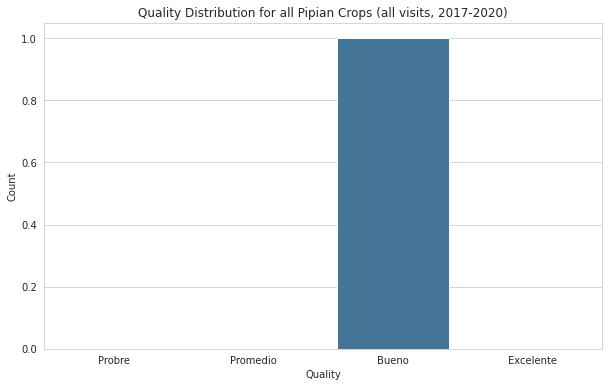

In [66]:
plt.rcParams["figure.figsize"] = (10,6)
for vegetable in sorted((vegetable_quality["Vegetales"].unique()), key=lambda x: -vegetable_quality["Vegetales"].value_counts()[x]):
  data = vegetable_quality[vegetable_quality["Vegetales"] == vegetable]
  g = sns.countplot(x="Calidad", data=data, order=["Probre", "Promedio", "Bueno", "Excelente"], palette="Blues_d")
  g.set_title(f"Quality Distribution for all {vegetable} Crops (all visits, 2017-2020)")
  g.set_xlabel("Quality")
  g.set_ylabel("Count")
  plt.savefig(f"/content/drive/MyDrive/Quality Distribution for all {vegetable} Crops (all visits, 2017-2020).png", dpi=300)
  plt.show()

### How Vegetable Crop Illness Has Changed Over Time for all Farms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


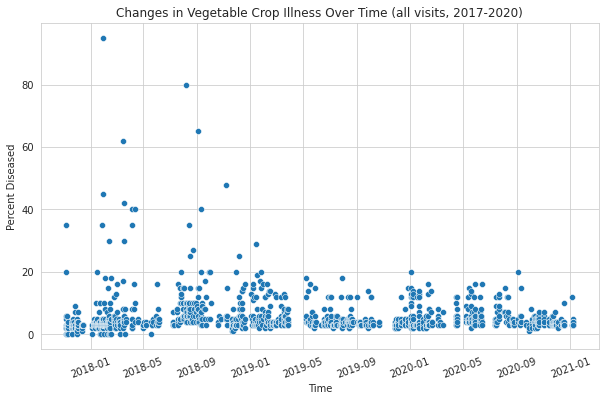

In [67]:
veg_time_dis = vegetable_data[["Fecha Visita", "% Enfermedad"]].dropna()
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(veg_time_dis['Fecha Visita'], veg_time_dis['% Enfermedad'], palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel('Time')
plt.ylabel('Percent Diseased')
plt.title("Changes in Vegetable Crop Illness Over Time (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Changes in Vegetable Crop Illness Over Time (all visits, 2017-2020).png", dpi=300)
plt.show()

## Analysis of Legume and Seed Crops

In [68]:
legume_data = all_data[misc_cols + leg_cols].copy()
legume_data = legume_data.rename(columns={"% Enfermedad.2": "% Enfermedad", "Calidad.2": "Calidad"})
legume_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Leguminosas y semillas,Estado.2,% Enfermedad,Calidad,Plaga.2,Recomendacion Organico.2,Recomendacion Quimico.2
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Nim,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Ajo y Cebolla,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
legume_data = legume_data[(legume_data["Leguminosas y semillas"] != "I")].replace({"Pipian": "Pipián", "Frijol Rojo": "Frijol rojo", "Frijoles rojo": "Frijol rojo", "Frijoles blanco": "Frijol blanco"})
legume_data = legume_data[legume_data["Calidad"] != "crisopa"]

print(legume_data["Leguminosas y semillas"].value_counts(), '\n')
print(legume_data["Calidad"].value_counts(), '\n')

Frijol de vara    662
Pipián            340
Frijol rojo         5
Ayote               5
Frijol blanco       2
Frijol alacin       1
Camote              1
Name: Leguminosas y semillas, dtype: int64 

Bueno        569
Excelente    301
Promedio      44
Pobre          4
Name: Calidad, dtype: int64 



### Legume and Seed Crop Illness and Quality

In [70]:
legume_disease = legume_data[["Leguminosas y semillas", "% Enfermedad"]].dropna()
legume_quality = legume_data[["Leguminosas y semillas", "Calidad"]].dropna()

#### Legume and Seed Disease

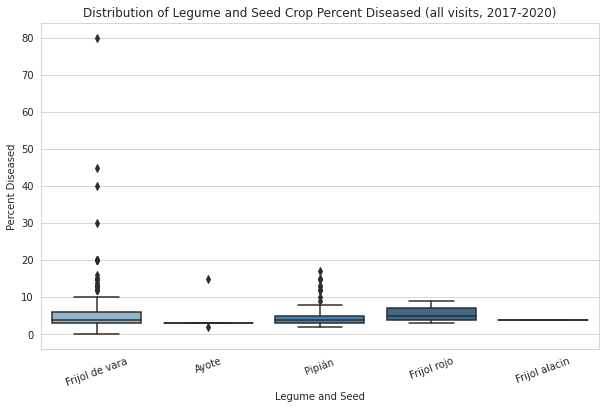

In [71]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Leguminosas y semillas", y="% Enfermedad", data=legume_disease, palette="Blues_d")
plt.xticks(rotation=20)
plt.ylabel("Percent Diseased")
plt.xlabel("Legume and Seed")
plt.title("Distribution of Legume and Seed Crop Percent Diseased (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Distribution of Legume and Seed Crop Percent Diseased (all visits, 2017-2020).png", dpi=300)
plt.show()

#### Legume and Seed Quality Distributions

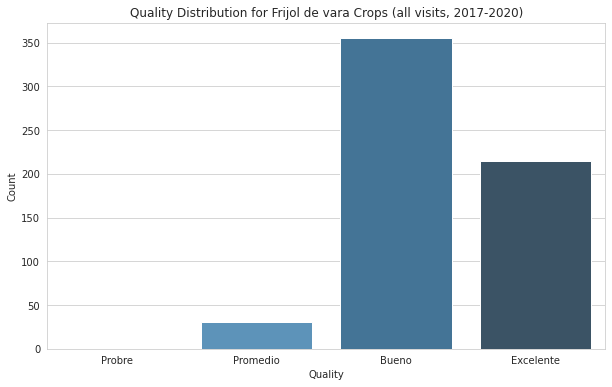

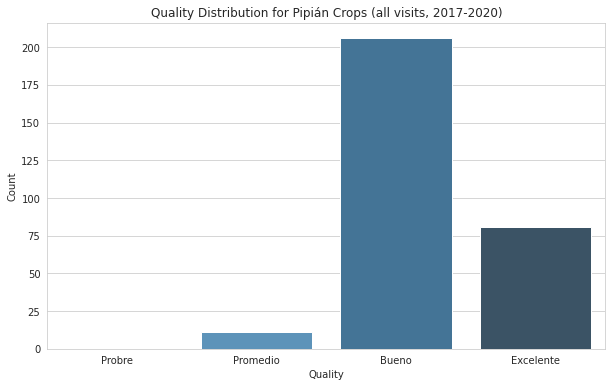

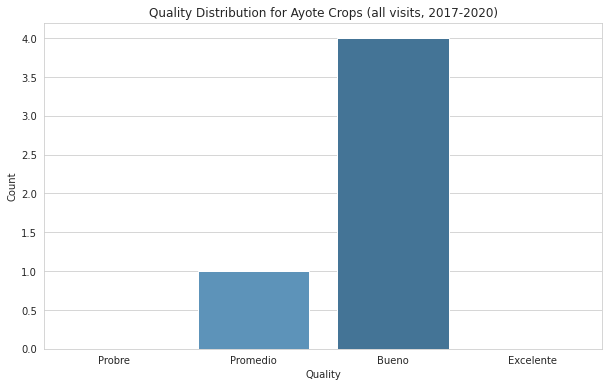

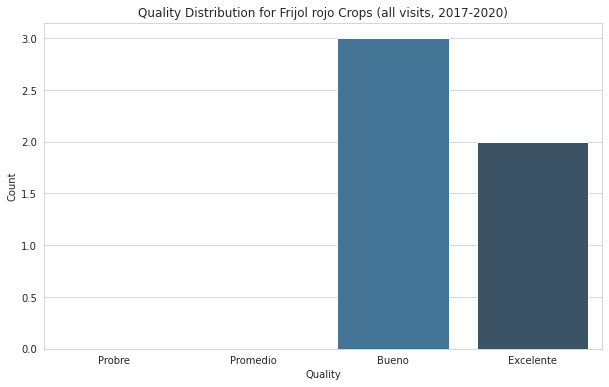

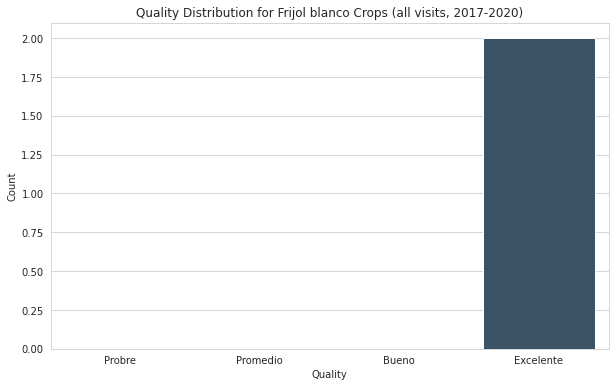

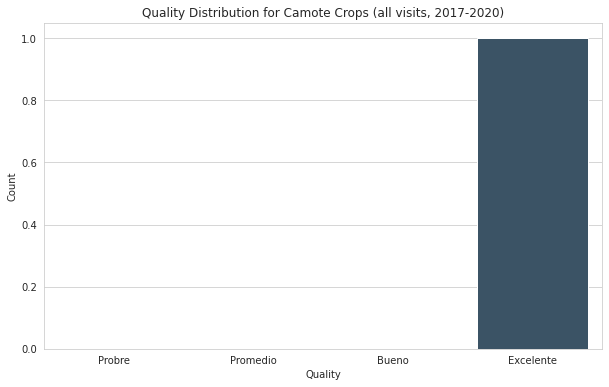

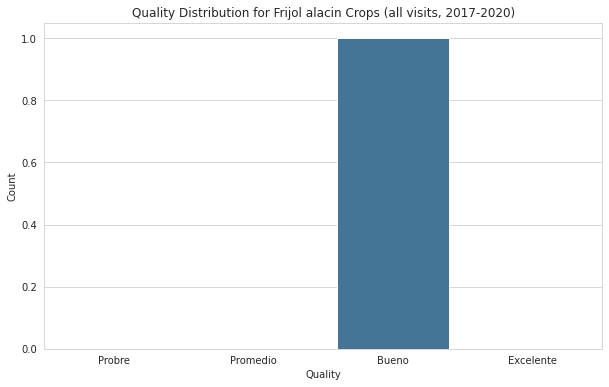

In [72]:
plt.rcParams["figure.figsize"] = (10, 6)
for legume in sorted(legume_quality["Leguminosas y semillas"].unique(), key=lambda x: -legume_quality["Leguminosas y semillas"].value_counts()[x]):
  data = legume_quality[legume_quality["Leguminosas y semillas"] == legume]
  g = sns.countplot(x="Calidad", data=data, order=["Probre", "Promedio", "Bueno", "Excelente"], palette="Blues_d")
  g.set_title(legume)
  g.set_title(f"Quality Distribution for {legume} Crops (all visits, 2017-2020)")
  g.set_xlabel("Quality")
  g.set_ylabel("Count")
  plt.savefig(f"/content/drive/MyDrive/Quality Distribution for {legume} Crops (all visits, 2017-2020).png", dpi=300)
  plt.show()

### How Legume and Seed Crop Illness Has Changed Over Time for all Farms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


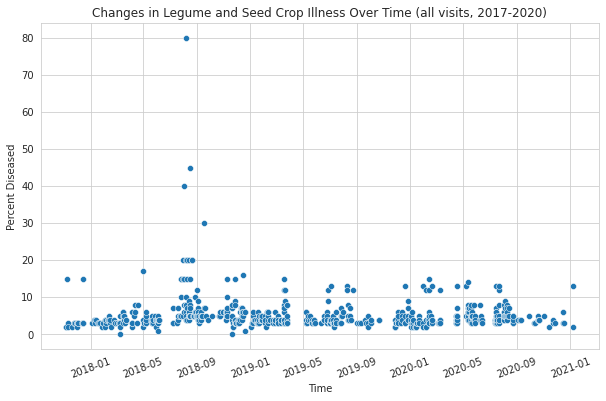

In [73]:
leg_time_dis = legume_data[["Fecha Visita", "% Enfermedad"]].dropna()
plt.rcParams["figure.figsize"] = (10, 6)
sns.scatterplot(leg_time_dis['Fecha Visita'], leg_time_dis['% Enfermedad'], palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel('Time')
plt.ylabel('Percent Diseased')
plt.title("Changes in Legume and Seed Crop Illness Over Time (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Changes in Legume and Seed Crop Illness Over Time (all visits, 2017-2020).png", dpi=300)

## Analysis of Grain Crops

In [74]:
grain_data = all_data[misc_cols + grain_cols].copy()
grain_data = grain_data.rename(columns={"% Enfermedad.3": "% Enfermedad", "Calidad.3": "Calidad"})
grain_data.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Gramíneos,Estado.3,% Enfermedad,Calidad,Plaga.3,Recomendacion Organico.3,Recomendacion Quimico.3
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
print(grain_data["Gramíneos"].value_counts(), '\n')
print(grain_data["Calidad"].value_counts(), '\n')

Maiz              276
Trigo               1
Caña de azucar      1
Name: Gramíneos, dtype: int64 

Excelente    123
Bueno         99
Promedio      21
Name: Calidad, dtype: int64 



### Grain Crop Illness and Quality

In [76]:
grain_disease = grain_data[["Gramíneos", "% Enfermedad"]].dropna()
grain_quality = grain_data[["Gramíneos", "Calidad"]].dropna()

#### Grain Disease

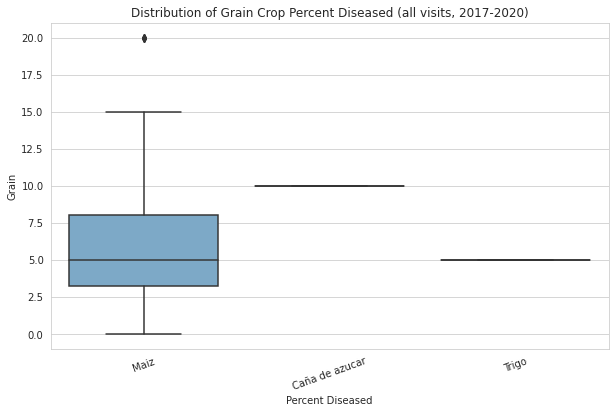

In [77]:
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x="Gramíneos", y="% Enfermedad", data=grain_disease, palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel("Percent Diseased")
plt.ylabel("Grain")
plt.title("Distribution of Grain Crop Percent Diseased (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Distribution of Grain Crop Percent Diseased (all visits, 2017-2020).png", dpi=300)
plt.show()

#### Grain Quality Distributions

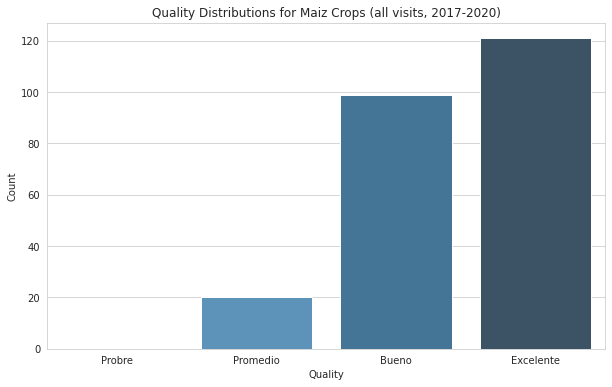

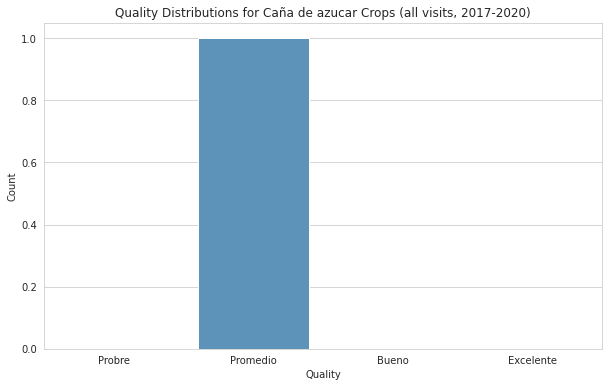

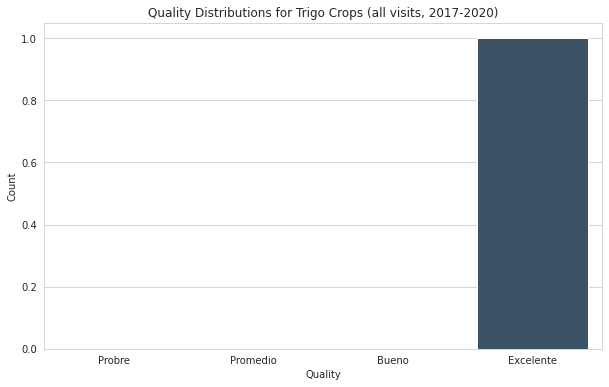

In [78]:
for grain in grain_quality["Gramíneos"].unique():
  data = grain_quality[grain_quality["Gramíneos"] == grain]
  g = sns.countplot(x="Calidad", data=data, order=["Probre", "Promedio", "Bueno", "Excelente"], palette="Blues_d")
  g.set_title(grain)
  g.set_xlabel("Quality")
  g.set_ylabel("Count")
  g.set_title(f"Quality Distributions for {grain} Crops (all visits, 2017-2020)")
  plt.savefig(f"/content/drive/MyDrive/Quality Distributions for {grain} Crops (all visits, 2017-2020).png", dpi=300)
  plt.show()

### How Grain Crop Illness Has Changed Over Time for all Farms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


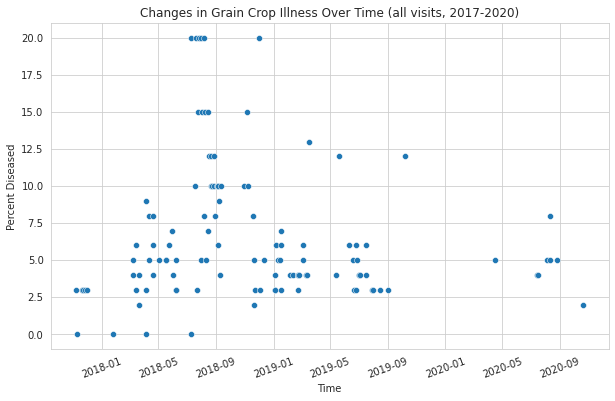

In [79]:
grain_time_dis = grain_data[["Fecha Visita", "% Enfermedad"]].dropna()
plt.rcParams["figure.figsize"] = (10,6)
sns.scatterplot(grain_time_dis['Fecha Visita'], grain_time_dis['% Enfermedad'], palette="Blues_d")
plt.xticks(rotation=20)
plt.xlabel('Time')
plt.ylabel('Percent Diseased')
plt.title("Changes in Grain Crop Illness Over Time (all visits, 2017-2020)")
plt.savefig("/content/drive/MyDrive/Changes in Grain Crop Illness Over Time (all visits, 2017-2020).png", dpi=300)
plt.show()

## Visualizations of the Effectiveness of Organic and Chemical Recommendations

In [80]:
common_org_recs = ["Ace", "Ajo y Cebolla", "Nim", "Hojas de chile"]
common_chem_recs = ["Sipermetrina"]

fruit_rec = all_data[["Fecha Visita", "% Enfermedad", "Recomendacion Organico", "Recomendacion Quimico"]].copy()
veg_rec = all_data[["Fecha Visita", "% Enfermedad.1", "Recomendacion Organico.1", "Recomendacion Quimico.1"]].copy().rename(columns={"% Enfermedad.1": "% Enfermedad", "Recomendacion Organico.1": "Recomendacion Organico", "Recomendacion Quimico.1": "Recomendacion Quimico"})
leg_rec = all_data[["Fecha Visita", "% Enfermedad.2", "Recomendacion Organico.2", "Recomendacion Quimico.2"]].copy().rename(columns={"% Enfermedad.2": "% Enfermedad", "Recomendacion Organico.2": "Recomendacion Organico", "Recomendacion Quimico.2": "Recomendacion Quimico"})
grain_rec = all_data[["Fecha Visita", "% Enfermedad.3", "Recomendacion Organico.3", "Recomendacion Quimico.3"]].copy().rename(columns={"% Enfermedad.3": "% Enfermedad", "Recomendacion Organico.3": "Recomendacion Organico", "Recomendacion Quimico.3": "Recomendacion Quimico"})
all_rec = fruit_rec.append(veg_rec, ignore_index=True).append(leg_rec, ignore_index=True).append(grain_rec, ignore_index=True)
all_rec = all_rec.dropna(subset=["% Enfermedad"])
all_rec = all_rec.dropna(thresh=2)
# Clean the percent diseased values
def clean_percents(value):
  if isinstance(value, str):
    temp = re.findall(r'\d+', value)
    try:
      return float(temp[0])
    except:
      return None
  return value
all_rec["% Enfermedad"] = all_rec["% Enfermedad"].apply(clean_percents)
all_rec = all_rec.sort_values(by="Fecha Visita")
all_rec.to_csv("/content/drive/MyDrive/recommendations_data.csv", index=False)
all_rec

,Fecha Visita,% Enfermedad,Recomendacion Organico,Recomendacion Quimico
0,2017-11-06,1.0,NaN,NaN
8860,2017-11-06,2.0,Nim,NaN
4447,2017-11-06,6.0,Ace,NaN
4446,2017-11-06,5.0,Ace,NaN
4445,2017-11-06,2.0,NaN,Triple 15
...,...,...,...,...
13279,2021-01-08,13.0,Bicarbonato,NaN
8848,2021-01-08,4.0,Ajo y Cebolla,NaN
8849,2021-01-08,3.0,Ace,NaN
4429,2021-01-08,4.0,Ace,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


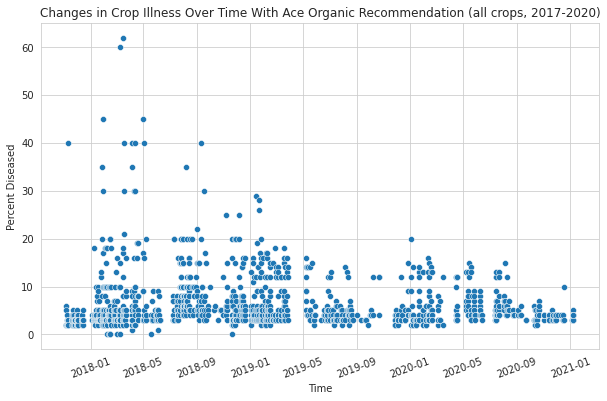

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


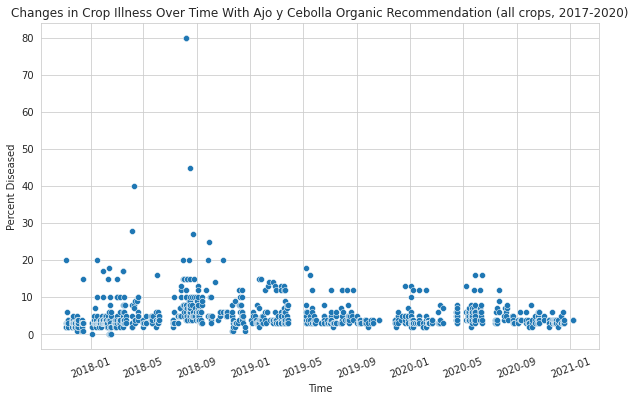

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


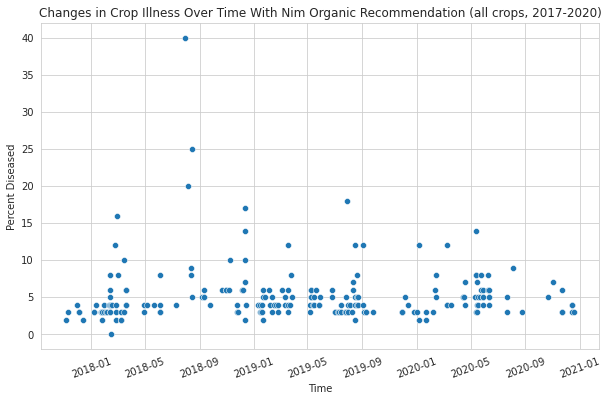

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


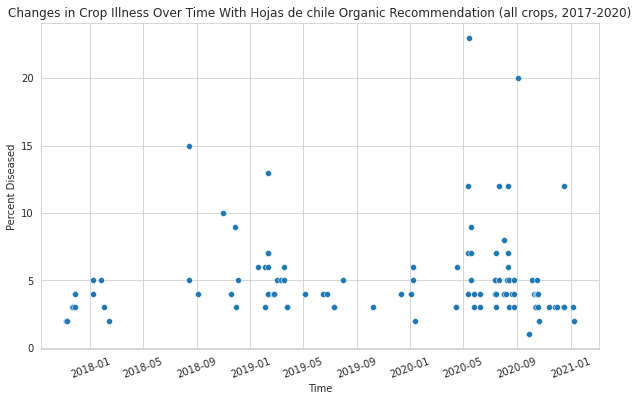

In [81]:
plt.rcParams["figure.figsize"] = (10,6)
for rec in common_org_recs:
  rec_df = all_rec[all_rec["Recomendacion Organico"] == rec]
  sns.scatterplot(rec_df['Fecha Visita'], rec_df['% Enfermedad'], palette="Blues_d")
  plt.xticks(rotation=20)
  plt.xlabel('Time')
  plt.ylabel('Percent Diseased')
  plt.title(f"Changes in Crop Illness Over Time With {rec} Organic Recommendation (all crops, 2017-2020)")
  plt.savefig(f"/content/drive/MyDrive/Changes in Crop Illness Over Time With {rec} Organic Recommendation (all crops, 2017-2020).png", dpi=300)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


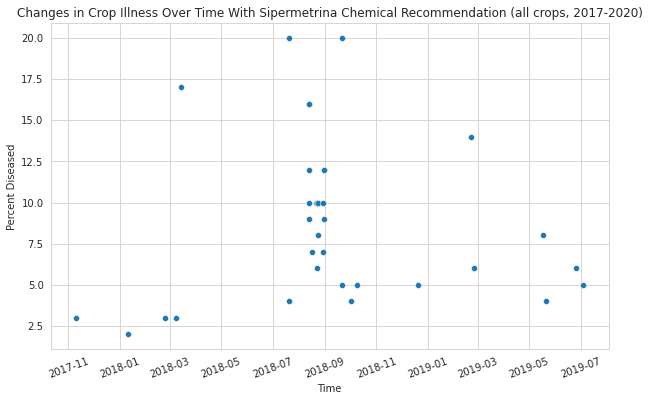

In [82]:
plt.rcParams["figure.figsize"] = (10,6)
for rec in common_chem_recs:
  rec_df = all_rec[all_rec["Recomendacion Quimico"] == rec]
  sns.scatterplot(rec_df['Fecha Visita'], rec_df['% Enfermedad'], palette="Blues_d")
  plt.xticks(rotation=20)
  plt.xlabel('Time')
  plt.ylabel('Percent Diseased')
  plt.title(f"Changes in Crop Illness Over Time With {rec} Chemical Recommendation (all crops, 2017-2020)")
  plt.savefig(f"/content/drive/MyDrive/Changes in Crop Illness Over Time With {rec} Chemical Recommendation (all crops, 2017-2020).png", dpi=300)
  plt.show()